In [2]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [8]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)
print X_train[:5]


[[[ 0.00000000e+00]
  [-1.17616108e-02]
  [-2.16457540e-02]
  [-3.80043229e-02]
  [-3.51754813e-02]
  [-2.94503778e-02]
  [-4.23149538e-02]
  [-2.34138705e-02]
  [-3.00060742e-02]
  [-2.16037194e-02]
  [-3.02502641e-02]
  [-2.64194827e-02]
  [-3.74991906e-02]
  [-2.60238043e-02]
  [-2.15531553e-02]
  [-2.23866486e-02]
  [-1.01956506e-02]
  [-1.27382677e-02]
  [-1.38159509e-02]
  [-7.50997165e-03]
  [-1.81350094e-02]
  [-1.40180044e-02]
  [-2.39105752e-02]
  [-2.83811214e-02]
  [-1.85812528e-02]
  [-1.17531832e-02]
  [-1.85218477e-03]
  [ 2.79513199e-03]
  [ 1.27973579e-03]
  [ 5.13569656e-03]
  [ 5.31246712e-03]
  [ 1.89432207e-03]
  [ 8.30132764e-03]
  [ 9.27798453e-03]
  [ 3.14877582e-03]
  [ 1.21741437e-02]
  [ 1.39169772e-02]
  [ 6.95427522e-03]
  [ 8.20872897e-03]
  [ 7.99824874e-03]
  [ 5.81770218e-03]
  [ 1.10881356e-02]
  [ 8.71386047e-03]
  [ 1.09954333e-02]
  [ 1.35970431e-02]
  [ 1.58449062e-02]
  [ 1.95325241e-02]
  [ 2.45840496e-02]
  [ 2.38600102e-02]
  [ 2.17636347e-02]]

In [9]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

compilation time :  0.017648935318


In [10]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 5s 1ms/step - loss: 0.0025 - val_loss: 0.0016


yo


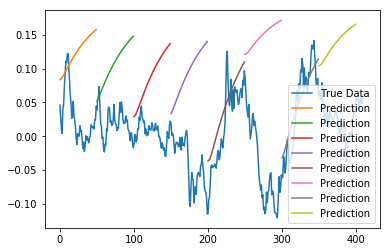

In [11]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)